<a href="https://colab.research.google.com/github/Vasantha-Meghana/Predictive_Analytics_Projects/blob/Products_a_Customer_Likely_to_Buy_Next/predictive8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1808665401.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations.values, y=recommendations.index, palette='plasma')


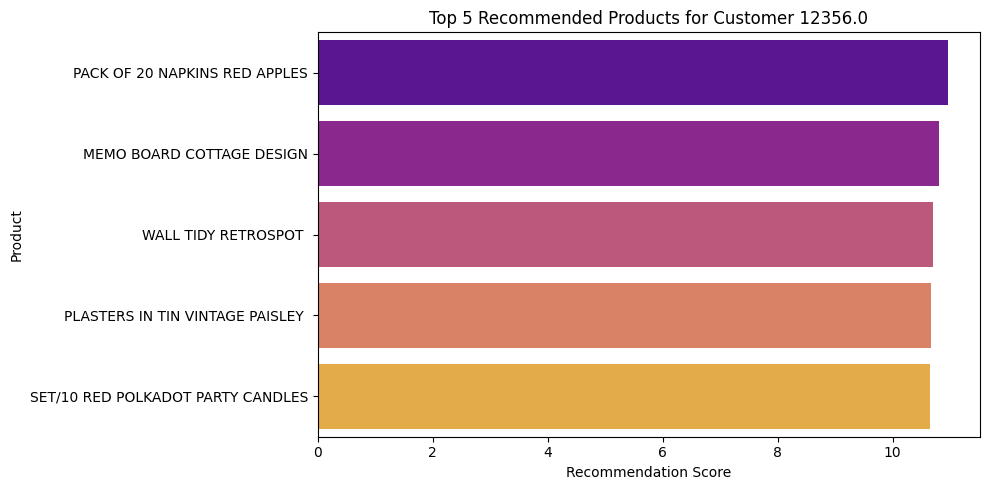

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load and clean data
df = pd.read_csv("online_retail.csv", encoding='latin1')
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
df = df[df['Quantity'] > 0]
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Create user-product matrix
user_product_matrix = pd.pivot_table(df, index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute product similarity
product_similarity = cosine_similarity(user_product_matrix.T)
product_similarity_df = pd.DataFrame(product_similarity, index=user_product_matrix.columns, columns=user_product_matrix.columns)

# Recommendation function
def recommend_products(customer_id, top_n=5):
    if customer_id not in user_product_matrix.index:
        return pd.Series([], dtype=float)
    customer_vector = user_product_matrix.loc[customer_id]
    purchased = customer_vector[customer_vector > 0].index.tolist()
    scores = pd.Series(dtype=float)
    for product in purchased:
        scores = scores.add(product_similarity_df[product], fill_value=0)
    scores = scores.drop(labels=purchased, errors='ignore')
    return scores.sort_values(ascending=False).head(top_n)

# Set customer ID
customer_id = "12356.0"

# Get recommendations
recommendations = recommend_products(customer_id)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=recommendations.values, y=recommendations.index, palette='plasma')
plt.title(f"Top {len(recommendations)} Recommended Products for Customer {customer_id}")
plt.xlabel("Recommendation Score")
plt.ylabel("Product")
plt.tight_layout()
plt.show()